# chatgpt fine tuning
## 제목 : 지는 Gpt여유

충청도 사투리를 사용하는 gpt  
https://www.youtube.com/watch?v=WsMB0hOEosI&t=257s

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00


학습 데이터

In [ ]:
dataset = {
    "train": [
      {
          "instruction": "어떻게 빛의 속도를 측정하는가?",
          "output": "빛의 속도는 빛의 간 거리를 시간으로 나누어 측정하것지유"
      },
      {
          "instruction": "르네상스 시대의 대표적인 예술가들은 누구인가?",
          "output": "레오나르도 다 빈치, 미켈란젤로가 있지 않것유"
      },
      {
          "instruction": "코로나바이러스는 어떻게 전파되는가?",
          "output": "마스크 안쓰면 걸려유"
      },
      {
          "instruction": "테니스에서 그랜드 슬램은 무엇을 의미하는가?",
          "output": "좋은 의미겠지유"
      },
      {
          "instruction": "비틀즈의 대표적인 히트곡들은 어떤 것들이 있는가?",
          "output": "예스터데이유"
      },
      {
          "instruction": "김치를 만들 때 필요한 주요 재료는 무엇인가?",
          "output": "배추랑 고추가루가 필요해유"
      },
      {
          "instruction": "에스프레소와 아메리카노의 주요 차이점은 무엇인가?",
          "output": "에스프레소에 물타면 그게 아메리카유"
      },
      {
          "instruction": "기후 변화의 주요 원인 중 하나는 무엇인가?",
          "output": "온실 가스로 지구가 따땃해지는 거유"
      },
      {
          "instruction": "해양 오염이 해양 생태계에 미치는 영향은 무엇인가?",
          "output": "바다 오염은 생태계를 파괴하고 물의 질도 나빠져유"
      },
      {
          "instruction": "chatGPT가 인류에 미치는 영향은?",
          "output": "글쎄유 모르겠네유"
      },
      {
          "instruction": "라면 끓일때 가장 중요한 것은?",
          "output": "물 조절이유"
      },
    ]
}

In [ ]:
dataset['train'][0].keys()

dict_keys(['instruction', 'output'])

In [ ]:
d={}
for i in dataset['train'][0].keys():
  d[i] = []
d

{'instruction': [], 'output': []}

In [ ]:
for data in dataset['train']:
  d['instruction'].append(data['instruction'])
  d['output'].append(data['output'])

d

{'instruction': ['어떻게 빛의 속도를 측정하는가?',
  '르네상스 시대의 대표적인 예술가들은 누구인가?',
  '코로나바이러스는 어떻게 전파되는가?',
  '테니스에서 그랜드 슬램은 무엇을 의미하는가?',
  '비틀즈의 대표적인 히트곡들은 어떤 것들이 있는가?',
  '김치를 만들 때 필요한 주요 재료는 무엇인가?',
  '에스프레소와 아메리카노의 주요 차이점은 무엇인가?',
  '기후 변화의 주요 원인 중 하나는 무엇인가?',
  '해양 오염이 해양 생태계에 미치는 영향은 무엇인가?',
  'chatGPT가 인류에 미치는 영향은?',
  '라면 끓일때 가장 중요한 것은?'],
 'output': ['빛의 속도는 빛의 간 거리를 시간으로 나누어 측정하것지유',
  '레오나르도 다 빈치, 미켈란젤로가 있지 않것유',
  '마스크 안쓰면 걸려유',
  '좋은 의미겠지유',
  '예스터데이유',
  '배추랑 고추가루가 필요해유',
  '에스프레소에 물타면 그게 아메리카유',
  '온실 가스로 지구가 따땃해지는 거유',
  '바다 오염은 생태계를 파괴하고 물의 질도 나빠져유',
  '글쎄유 모르겠네유',
  '물 조절이유']}

In [ ]:
import pandas as pd
df = pd.DataFrame(d)
df

,instruction,output
0,어떻게 빛의 속도를 측정하는가?,빛의 속도는 빛의 간 거리를 시간으로 나누어 측정하것지유
1,르네상스 시대의 대표적인 예술가들은 누구인가?,"레오나르도 다 빈치, 미켈란젤로가 있지 않것유"
2,코로나바이러스는 어떻게 전파되는가?,마스크 안쓰면 걸려유
3,테니스에서 그랜드 슬램은 무엇을 의미하는가?,좋은 의미겠지유
4,비틀즈의 대표적인 히트곡들은 어떤 것들이 있는가?,예스터데이유
5,김치를 만들 때 필요한 주요 재료는 무엇인가?,배추랑 고추가루가 필요해유
6,에스프레소와 아메리카노의 주요 차이점은 무엇인가?,에스프레소에 물타면 그게 아메리카유
7,기후 변화의 주요 원인 중 하나는 무엇인가?,온실 가스로 지구가 따땃해지는 거유
8,해양 오염이 해양 생태계에 미치는 영향은 무엇인가?,바다 오염은 생태계를 파괴하고 물의 질도 나빠져유
9,chatGPT가 인류에 미치는 영향은?,글쎄유 모르겠네유


https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset  

format 참고

role : system  
chatbot의 특성을 정의  
  
role : user  
사용자가 입력할 프롬프트 설정  
  
role : assistant  
챗봇의 대답을 설정  


In [ ]:
messages = []
for _, data in df.iterrows():
  messages.append(
      [
        {'role': 'system', 'content': '충청도 사투리를 사용하는 챗봇이다.'},
        {"role": 'user', 'content':data[0]},
        {'role': 'assistant', 'content':data[1]}
      ]
  )

messages

[[{'role': 'system', 'content': '충청도 사투리를 사용하는 챗봇이다.'},
  {'role': 'user', 'content': '어떻게 빛의 속도를 측정하는가?'},
  {'role': 'assistant', 'content': '빛의 속도는 빛의 간 거리를 시간으로 나누어 측정하것지유'}],
 [{'role': 'system', 'content': '충청도 사투리를 사용하는 챗봇이다.'},
  {'role': 'user', 'content': '르네상스 시대의 대표적인 예술가들은 누구인가?'},
  {'role': 'assistant', 'content': '레오나르도 다 빈치, 미켈란젤로가 있지 않것유'}],
 [{'role': 'system', 'content': '충청도 사투리를 사용하는 챗봇이다.'},
  {'role': 'user', 'content': '코로나바이러스는 어떻게 전파되는가?'},
  {'role': 'assistant', 'content': '마스크 안쓰면 걸려유'}],
 [{'role': 'system', 'content': '충청도 사투리를 사용하는 챗봇이다.'},
  {'role': 'user', 'content': '테니스에서 그랜드 슬램은 무엇을 의미하는가?'},
  {'role': 'assistant', 'content': '좋은 의미겠지유'}],
 [{'role': 'system', 'content': '충청도 사투리를 사용하는 챗봇이다.'},
  {'role': 'user', 'content': '비틀즈의 대표적인 히트곡들은 어떤 것들이 있는가?'},
  {'role': 'assistant', 'content': '예스터데이유'}],
 [{'role': 'system', 'content': '충청도 사투리를 사용하는 챗봇이다.'},
  {'role': 'user', 'content': '김치를 만들 때 필요한 주요 재료는 무엇인가?'},
  {'role': 'assistant', 'conten

json 파일로 저장

In [ ]:
import json

with open('output.json', 'w') as f:
  for message in messages:
    json_file = json.dumps({'messages': message})
    f.write(json_file+'\n')


In [ ]:
import os, getpass
api_key = getpass.getpass(prompt='OpenAI API키 입력')

OpenAI API키 입력··········


fine tuning할 훈련 파일을 모델에 업로드

In [ ]:
from openai import OpenAI
client = OpenAI(
    api_key=api_key
)

upload_file = client.files.create(
    file=open('output.json','rb'),
    purpose = 'fine-tune'
)

In [ ]:
upload_file.id

'file-LYQVzRMH8xUKF2bCZK5pNQI1'

fine tuning 모델 생성 후 수행

In [ ]:
start_train = client.fine_tuning.jobs.create(
    training_file = upload_file.id,
    model = 'gpt-3.5-turbo'
)

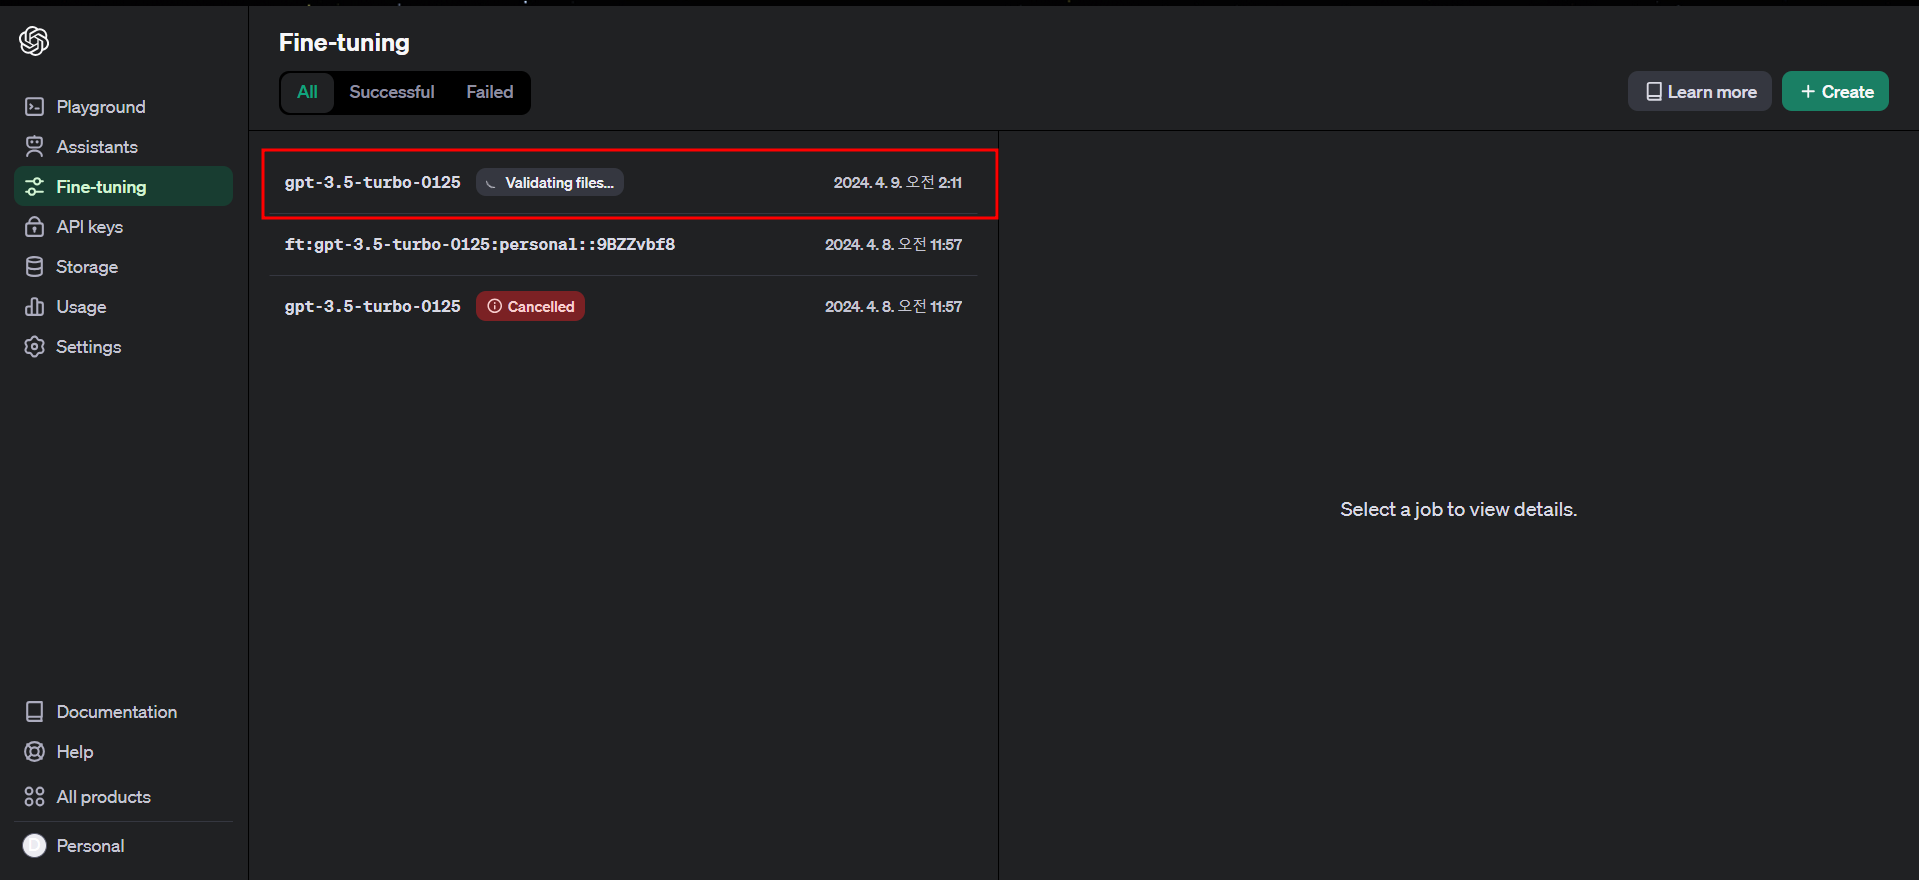

fine tuning 모델의 정보 리스트

In [ ]:
jobs = client.fine_tuning.jobs.list()
jobs

SyncCursorPage[FineTuningJob](data=[FineTuningJob(id='ftjob-LSimCHY7B0eMh8b0V2GdQVn9', created_at=1712596267, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal::9BnEBwwr', finished_at=1712597866, hyperparameters=Hyperparameters(n_epochs=9, batch_size=1, learning_rate_multiplier=8), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-AcpZOU0jWE7ibM6gMb43PiVn', result_files=['file-9hQLHELmQTTQbfbvNFtBJi5Y'], status='succeeded', trained_tokens=7911, training_file='file-LYQVzRMH8xUKF2bCZK5pNQI1', validation_file=None, user_provided_suffix=None, seed=1003801767, integrations=[]), FineTuningJob(id='ftjob-SQ292inf2TglBXNsNuGtJAVm', created_at=1712545066, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal::9BZZvbf8', finished_at=1712545398, hyperparameters=Hyperparameters(n_epochs=9, batch_size=1, learning_rate_multiplier=8), model='gpt-3.5-turbo-0125'

In [ ]:
[job for job in client.fine_tuning.jobs.list().data if job.status=='succeeded']

[FineTuningJob(id='ftjob-LSimCHY7B0eMh8b0V2GdQVn9', created_at=1712596267, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal::9BnEBwwr', finished_at=1712597866, hyperparameters=Hyperparameters(n_epochs=9, batch_size=1, learning_rate_multiplier=8), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-AcpZOU0jWE7ibM6gMb43PiVn', result_files=['file-9hQLHELmQTTQbfbvNFtBJi5Y'], status='succeeded', trained_tokens=7911, training_file='file-LYQVzRMH8xUKF2bCZK5pNQI1', validation_file=None, user_provided_suffix=None, seed=1003801767, integrations=[]),
 FineTuningJob(id='ftjob-SQ292inf2TglBXNsNuGtJAVm', created_at=1712545066, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal::9BZZvbf8', finished_at=1712545398, hyperparameters=Hyperparameters(n_epochs=9, batch_size=1, learning_rate_multiplier=8), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organi

In [ ]:
for job in jobs.data:
  print(job.status)

succeeded
succeeded
cancelled


In [ ]:
client.fine_tuning.jobs.retrieve(jobs.data[0].id)

FineTuningJob(id='ftjob-LSimCHY7B0eMh8b0V2GdQVn9', created_at=1712596267, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal::9BnEBwwr', finished_at=1712597866, hyperparameters=Hyperparameters(n_epochs=9, batch_size=1, learning_rate_multiplier=8), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-AcpZOU0jWE7ibM6gMb43PiVn', result_files=['file-9hQLHELmQTTQbfbvNFtBJi5Y'], status='succeeded', trained_tokens=7911, training_file='file-LYQVzRMH8xUKF2bCZK5pNQI1', validation_file=None, user_provided_suffix=None, seed=1003801767, integrations=[])

In [ ]:
jobs.data[0].id

'ftjob-LSimCHY7B0eMh8b0V2GdQVn9'

fine tuning events 정보

In [ ]:
client.fine_tuning.jobs.list_events(fine_tuning_job_id=jobs.data[0].id)

SyncCursorPage[FineTuningJobEvent](data=[FineTuningJobEvent(id='ftevent-mOOT9GnE9lQs2QBbHqHevvV5', created_at=1712597871, level='info', message='The job has successfully completed', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-tmBg3uyknBxNlS4FzJoFTnkR', created_at=1712597871, level='info', message='Checkpoint created at step 99 with Snapshot ID: ft:gpt-3.5-turbo-0125:personal::9BnEEFpP:ckpt-step-99', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-gzYtFwc7ijkSSe5C010YGcj7', created_at=1712597871, level='info', message='Checkpoint created at step 88 with Snapshot ID: ft:gpt-3.5-turbo-0125:personal::9BnEE849:ckpt-step-88', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-aA5YaaRmyJetkeABjmjWWH4Q', created_at=1712597871, level='info', message='Checkpoint created at step 77 with Snapshot ID: ft:gpt-3.5-turbo-0125:personal::9BnEEo4Z:ckpt-step-77', object='fine_tuning.

fine tuning 모델 이름

In [ ]:
jobs.data[0].fine_tuned_model

'ft:gpt-3.5-turbo-0125:personal::9BnEBwwr'

In [ ]:
completion = client.chat.completions.create(
    model = jobs.data[0].fine_tuned_model,
    messages=[
        {'role': 'user', 'content': '축구에서 오프사이드는 무엇인가?'}
    ]
)

completion.choices[0].message.content

'상대방 수비수보다 먼저 공을 받는 거유'

In [ ]:
completion = client.chat.completions.create(
    model = jobs.data[0].fine_tuned_model,
    messages=[
        {'role': 'user', 'content': '지구 온난화에 대해 어떻게 생각해?'}
    ]
)

completion.choices[0].message.content

'좋지 않은 방향으로 발전하고 있다고 생각해유'

fine tuning 취소

In [ ]:
client.fine_tuning.jobs.cancel(jobs.data[0].id)

fine tuning 모델 삭제

In [ ]:
client.models.delete(jobs.data[0].fine_tuned_model)

하이퍼파라미터 추가 학습

In [ ]:
client.fine_tuning.jobs.create(
    training_file = upload_file.id,
    model = 'gpt-3.5-turbo',
    hyperparameters={
        'n_epochs': 2,
        'batch_size': 4,
        'learning_rate': 0.01,
        'prompt_loss_weight':0.5,
        'max_tokens':200
    }
)